1. Data Exploration and Preprocessing

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("Alphabets_data.csv")

# Initial exploration
print("First few rows of the dataset:")
print(data.head())

print("\nMissing values:")
print(data.isnull().sum())

print("\nData types:")
print(data.dtypes)

print("\nSummary statistics:")
print(data.describe())

First few rows of the dataset:
  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  

Missing values:
letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey   

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("Alphabets_data.csv")

# Scaling numerical features
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Save the preprocessed data
data.to_csv("preprocessed_data.csv", index=False)

# Explore the preprocessed data
print("\nPreprocessed data:")
print(data.head())



Preprocessed data:
  letter      xbox      ybox     width    height     onpix      xbar  \
0      T -1.057698  0.291877 -1.053277 -0.164704 -1.144013  0.544130   
1      I  0.510385  1.502358 -1.053277  0.719730 -0.687476  1.531305   
2      D -0.012309  1.199738  0.435910  1.161947  1.138672  1.531305   
3      N  1.555774  1.199738  0.435910  0.277513 -0.230939 -0.936631   
4      G -1.057698 -1.826464 -1.053277 -1.933571 -1.144013  0.544130   

       ybar     x2bar     y2bar     xybar    x2ybar    xy2bar     xedge  \
0  2.365097 -1.714360  0.344994 -0.917071  1.347774  0.034125 -1.305948   
1 -1.075326  0.137561 -0.495072  1.895968 -1.312807  0.514764 -0.448492   
2 -0.645273 -0.973591  0.344994  0.690380 -1.312807 -0.446513 -0.019764   
3  0.644886 -0.232823  0.344994 -1.720796 -0.932724  0.995402  1.266419   
4 -0.645273  0.507945  0.344994 -0.917071 -0.552641  0.514764 -0.877220   

     xedgey     yedge    yedgex  
0 -0.219082 -1.438153  0.122911  
1 -0.219082  0.120081  1.359

In [3]:
!pip install tensorflow

2. Model Implementation|

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
data = pd.read_csv("Alphabets_data.csv")

# Separate features and target variable
X = data.drop('letter', axis=1)
y = data['letter']

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Divide the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ANN model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # Input layer + Hidden layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

# Decode the predictions
predicted_letters = label_encoder.inverse_transform(y_pred)

# Calculate accuracy
accuracy = accuracy_score(label_encoder.inverse_transform(y_test), predicted_letters)
print("Accuracy:", accuracy)


Epoch 1/10


C:\Users\siris\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2171 - loss: 2.8115 - val_accuracy: 0.6281 - val_loss: 1.3745
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6615 - loss: 1.2233 - val_accuracy: 0.7250 - val_loss: 0.9884
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7426 - loss: 0.9367 - val_accuracy: 0.7650 - val_loss: 0.8727
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7755 - loss: 0.8055 - val_accuracy: 0.7831 - val_loss: 0.7903
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7936 - loss: 0.7395 - val_accuracy: 0.7887 - val_loss: 0.7490
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8055 - loss: 0.6746 - val_accuracy: 0.7869 - val_loss: 0.7110
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8162 - loss: 0.6256 - val_accuracy: 0.8344 - val_loss: 0.6080
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8308 - loss: 0.5770 - val_accuracy: 0.8281 - val_

In [5]:
# Train the model with validation data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8568 - loss: 0.4878 - val_accuracy: 0.8495 - val_loss: 0.4982
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8627 - loss: 0.4682 - val_accuracy: 0.8550 - val_loss: 0.4771
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8640 - loss: 0.4426 - val_accuracy: 0.8610 - val_loss: 0.4613
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8674 - loss: 0.4350 - val_accuracy: 0.8717 - val_loss: 0.4141
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8715 - loss: 0.4108 - val_accuracy: 0.8553 - val_loss: 0.4477
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8773 - loss: 0.3910 - val_accuracy: 0.8742 - val_loss: 0.4037
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8776 - loss: 0.3924 - val_accuracy: 0.8745 - val_loss: 0.3964
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8835 - loss: 0.3689 - val_accuracy: 0.

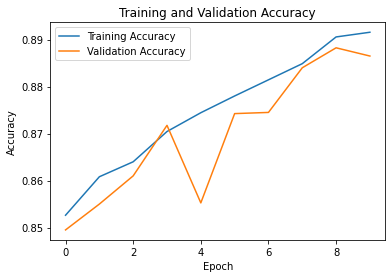

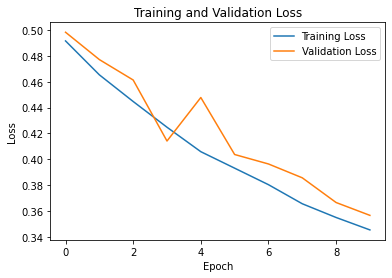

In [6]:
import matplotlib.pyplot as plt

# Get training history
history = model.history.history

# Plot training and validation accuracy
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


3. Hyperparameter Tuning

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Alphabets_data.csv')

# Select only numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
X = data[numerical_columns]

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Convert the standardized features to a DataFrame and generate descriptive statistics
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)
description = X_standardized_df.describe()

print(description)


               xbox          ybox         width        height         onpix  \
count  2.000000e+04  2.000000e+04  2.000000e+04  2.000000e+04  2.000000e+04   
mean  -1.030287e-16  3.659295e-17 -8.242296e-17  1.417533e-16 -1.003642e-16   
std    1.000025e+00  1.000025e+00  1.000025e+00  1.000025e+00  1.000025e+00   
min   -2.103087e+00 -2.129084e+00 -2.542463e+00 -2.375788e+00 -1.600550e+00   
25%   -5.350039e-01 -6.159833e-01 -5.568812e-01 -6.069205e-01 -6.874762e-01   
50%   -1.230945e-02 -1.074302e-02 -6.048579e-02  2.775132e-01 -2.309392e-01   
75%    5.103850e-01  5.944973e-01  4.359097e-01  7.197301e-01  6.821347e-01   
max    5.737329e+00  2.410218e+00  4.903469e+00  4.257465e+00  5.247504e+00   

               xbar          ybar         x2bar         y2bar         xybar  \
count  2.000000e+04  2.000000e+04  2.000000e+04  2.000000e+04  2.000000e+04   
mean   1.104894e-16  4.156675e-17  1.747935e-16 -6.181722e-17  4.440892e-17   
std    1.000025e+00  1.000025e+00  1.000025e+00  1.

In [9]:
# import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("Alphabets_data.csv")

# Split features and target variable
X = data.drop(columns=["letter"])
y = data["letter"]

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network classifier
mlp = MLPClassifier(random_state=42)

# Define hyperparameters to tune
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],  # Changed to 'adam' solver, which often converges faster
    'learning_rate_init': [0.001, 0.01],  # Removed 'constant' and 'adaptive' for simplicity
    'batch_size': [16, 32]  # Reduced batch size options
}

# Random Search
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=20, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
# Reduced number of iterations to 20, reduced CV folds to 3, and used all available CPU cores with 'n_jobs=-1'
random_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best parameters found:", random_search.best_params_)
print("Best accuracy found:", random_search.best_score_)

# Evaluate the model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)


Best parameters found: {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100, 50), 'batch_size': 32, 'activation': 'tanh'}
Best accuracy found: 0.9508751636684828
Accuracy on test set: 0.96425


# Lasso and Ridge method

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("Alphabets_data.csv")

# Split features and target variable
X = data.drop(columns=["letter"])
y = data["letter"]

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Ridge classifier
ridge = RidgeClassifier(random_state=42)

# Define hyperparameters to tune for Ridge
param_dist_ridge = {
    'alpha': [0.1, 1.0, 10.0]  # Regularization strength
}

# Random Search for Ridge
random_search_ridge = RandomizedSearchCV(ridge, param_distributions=param_dist_ridge, n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
random_search_ridge.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy for Ridge
print("Best parameters found for Ridge:", random_search_ridge.best_params_)
print("Best accuracy found for Ridge:", random_search_ridge.best_score_)

# Evaluate the best Ridge model on the test set
best_model_ridge = random_search_ridge.best_estimator_
y_pred_ridge = best_model_ridge.predict(X_test)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
print("Accuracy on test set for Ridge:", accuracy_ridge)


C:\Users\siris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters found for Ridge: {'alpha': 0.1}
Best accuracy found for Ridge: 0.5549374184030483
Accuracy on test set for Ridge: 0.56275


# Evaluation

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the dataset
data = pd.read_csv("Alphabets_data.csv")

# Split features and target variable
X = data.drop(columns=["letter"])
y = data["letter"]

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network classifier with default hyperparameters
mlp_default = MLPClassifier(random_state=42)

# Train the default model
mlp_default.fit(X_train, y_train)

# Predictions on test set for default model
y_pred_default = mlp_default.predict(X_test)

# Evaluate default model
print("Performance metrics for MLPClassifier with default hyperparameters:")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("Precision:", precision_score(y_test, y_pred_default, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_default, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_default, average='weighted'))
print(classification_report(y_test, y_pred_default))

# Define hyperparameters to tune
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.01],
    'batch_size': [16, 32]
}

# Define the neural network classifier for tuning
mlp_tuned = MLPClassifier(random_state=42)

# Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(mlp_tuned, param_distributions=param_dist, n_iter=20, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found:", random_search.best_params_)

# Predictions on test set for tuned model
best_model = random_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Evaluate tuned model
print("\nPerformance metrics for MLPClassifier with tuned hyperparameters:")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_tuned, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_tuned, average='weighted'))
print(classification_report(y_test, y_pred_tuned))


C:\Users\siris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Performance metrics for MLPClassifier with default hyperparameters:
Accuracy: 0.95575
Precision: 0.9562852091028711
Recall: 0.95575
F1-score: 0.9557715906452945
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       149
           1       0.91      0.94      0.93       153
           2       0.98      0.95      0.96       137
           3       0.93      0.97      0.95       156
           4       0.94      0.95      0.95       141
           5       0.94      0.94      0.94       140
           6       0.92      0.96      0.94       160
           7       0.92      0.85      0.88       144
           8       0.97      0.95      0.96       146
           9       0.95      0.96      0.95       149
          10       0.89      0.94      0.91       130
          11       0.97      0.97      0.97       155
          12       0.98      0.99      0.99       168
          13       0.98      0.93      0.95       151
          14       0.94     

C:\Users\siris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\siris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\siris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\siris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Best parameters found: {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100, 50), 'batch_size': 32, 'activation': 'tanh'}

Performance metrics for MLPClassifier with tuned hyperparameters:
Accuracy: 0.96425
Precision: 0.9645269451279199
Recall: 0.96425
F1-score: 0.96424619747597
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       149
           1       0.94      0.97      0.95       153
           2       0.98      0.93      0.95       137
           3       0.96      0.98      0.97       156
           4       0.93      0.96      0.94       141
           5       0.94      0.96      0.95       140
           6       0.96      0.97      0.97       160
           7       0.91      0.88      0.89       144
           8       0.99      0.95      0.97       146
           9       0.96      0.97      0.96       149
          10       0.91      0.92      0.91       130
          11       0.97      0.96      0.96      